|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)


## Set up

In [1]:
#import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import copy as cp

from sklearn.model_selection import train_test_split

In [2]:
#load data
df_raw = pd.read_csv("raw_data.csv") 
df = cp.deepcopy(df_raw)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_raw.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Data Exploration

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#most people have credit history
print(f"Credit History \ndon't have: {len(df.loc[df['Credit_History'] == 0])} do have:{len(df.loc[df['Credit_History'] == 1])}")

Credit History 
don't have: 89 do have:475


In [6]:
cat_cols = df.columns[df.dtypes == 'object']

for cat_col in cat_cols[1:]:
    print(f"{cat_col}: {df[cat_col].unique()} \n Frequency: {df.value_counts(cat_col).values}")

Gender: ['Male' 'Female' nan] 
 Frequency: [489 112]
Married: ['No' 'Yes' nan] 
 Frequency: [398 213]
Dependents: ['0' '1' '2' '3+' nan] 
 Frequency: [345 102 101  51]
Education: ['Graduate' 'Not Graduate'] 
 Frequency: [480 134]
Self_Employed: ['No' 'Yes' nan] 
 Frequency: [500  82]
Property_Area: ['Urban' 'Rural' 'Semiurban'] 
 Frequency: [233 202 179]
Loan_Status: ['Y' 'N'] 
 Frequency: [422 192]


In [7]:
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Notes**: A lot more men than women. Mostly no kids or 1-2 kids. A lot more graduates, very few self-employed. Almost all have a credit history. Most loans in this dataset are accepted (almost 4:1 ratio)

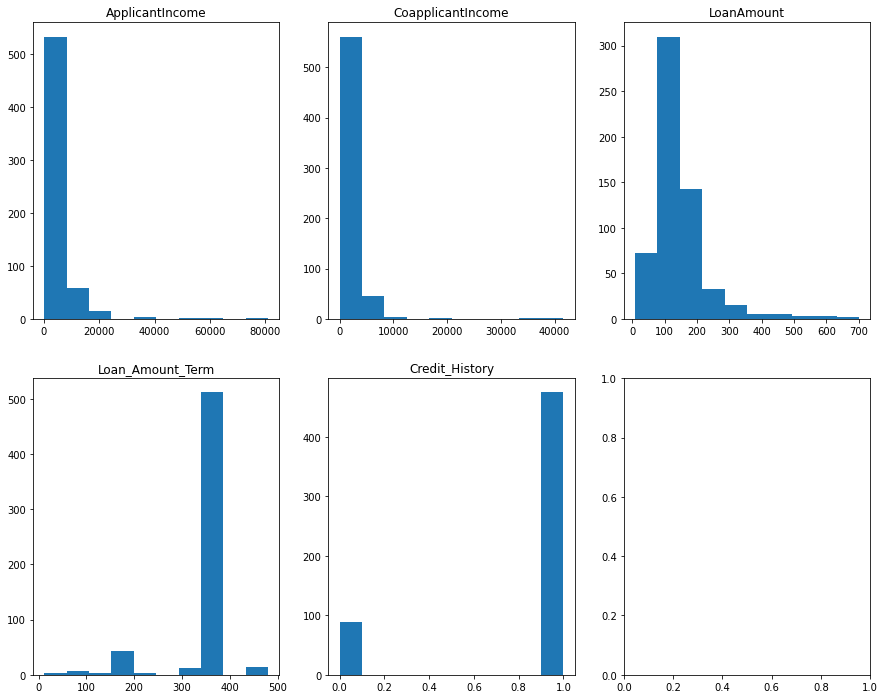

In [8]:
#numerical distribution analysis
fig, axes = plt.subplots(2, 3, figsize = (15, 12))
num_cols = df.columns[df.dtypes != 'object']
num_df = df[num_cols]

for i, ax in enumerate(axes.flat[:5]):
    ax.hist(num_df.iloc[:,i])
    ax.set_title(num_df.columns[i])

## Data Transformation

### Replace Nan

In [9]:
#missing values
print(df.isnull().sum() * 100 / len(df))

#save missing value columns
null_col = df.columns[df.isnull().any()]

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [10]:
print(num_cols & null_col) #impute metrics: mean, most_frequent, '1'
print(cat_cols & null_col) #impute metrics: 'M', 'No', '0', 'No'

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History'], dtype='object')
Index(['Gender', 'Married', 'Dependents', 'Self_Employed'], dtype='object')


/var/folders/r6/fys6jqz12zg0mt2n15r5gw3m0000gq/T/ipykernel_25443/1012211590.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  print(num_cols & null_col) #impute metrics: mean, most_frequent, '1'
/var/folders/r6/fys6jqz12zg0mt2n15r5gw3m0000gq/T/ipykernel_25443/1012211590.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  print(cat_cols & null_col) #impute metrics: 'M', 'No', '0', 'No'


In [11]:
df[null_col[4]].mean()

146.41216216216216

In [12]:
#replace nans
replace_value = ['Male', 'No', 0, 'No', 146.412162, 360, 1] 

for i, col in enumerate(null_col):
    df[col] = df[col].fillna(replace_value[i])

### Numerical (log) 

(array([  7.,  53., 186., 205.,  91.,  41.,  20.,   4.,   5.,   2.]),
 array([ 7.27378632,  7.67662813,  8.07946994,  8.48231175,  8.88515356,
         9.28799538,  9.69083719, 10.093679  , 10.49652081, 10.89936262,
        11.30220443]),
 <BarContainer object of 10 artists>)

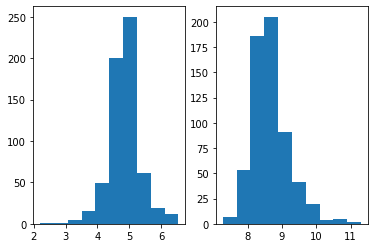

In [13]:
#log loan amount and compined applicant/coapplicant income
log_amount = np.log(df['LoanAmount'])
log_income = np.log(df['ApplicantIncome'] + df['CoapplicantIncome'])

#put into df and drop former columns
df['LogAmount'] = log_amount
df['LogIncomes'] = log_income
df = df.drop(['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome'], axis = 1)

#plot to see how it looks now
fig, axes = plt.subplots(1, 2)

axes[0].hist(log_amount)
axes[1].hist(log_income )

### Categorical Transformation

In [14]:
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
#as a reminder these are the cat variables
for cat_col in cat_cols[1:]:
    print(f"{cat_col}: {df[cat_col].unique()}")

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+' 0]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [16]:
#most of them are binary or non-ordinal, so convert via dummy
for_dummy = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

#create columns with dummies
dummy = pd.get_dummies(df[for_dummy], drop_first= True)
df = pd.concat([df, dummy], axis =1)

In [17]:
#drop all former dummy variables and id column
df = df.drop(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'], axis = 1)

In [18]:
#fix last catogirical variable: Dependents
df['Dependents'] = df['Dependents'].replace({'3+': 3})

#convert into numeric
df['Dependents'] = df['Dependents'].apply(pd.to_numeric, errors='coerce')

In [19]:
#should have no nulls and only numeric dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    int64  
 1   Loan_Amount_Term         614 non-null    float64
 2   Credit_History           614 non-null    float64
 3   LogAmount                614 non-null    float64
 4   LogIncomes               614 non-null    float64
 5   Gender_Male              614 non-null    uint8  
 6   Married_Yes              614 non-null    uint8  
 7   Education_Not Graduate   614 non-null    uint8  
 8   Self_Employed_Yes        614 non-null    uint8  
 9   Property_Area_Semiurban  614 non-null    uint8  
 10  Property_Area_Urban      614 non-null    uint8  
 11  Loan_Status_Y            614 non-null    uint8  
dtypes: float64(4), int64(1), uint8(7)
memory usage: 28.3 KB


### Data Split 

(Cross fold?)

In [20]:
#create a raw X with a numerical y
y = df['Loan_Status_Y']
X = df_raw.drop(['Loan_Status'], axis=1)

X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [21]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [22]:
from collections import Counter

In [23]:
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 295, 0: 134})
Counter({1: 127, 0: 58})


## Pipeline

In [24]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### Processing

See custom functions in more detail at `custom_functions.py`

In [25]:
%run -i custom_functions.py

In [26]:
#transform all custom functions into sklearn functions
drop_ID = FunctionTransformer(dropID)
keep_num = FunctionTransformer(numFeat)
keep_cat = FunctionTransformer(catFeat)
log_trans = FunctionTransformer(log_transform)
cat_trans = FunctionTransformer(cat_transform)

imp_trans = FunctionTransformer(impute)

In [27]:
#define the process steps for num and cat, seperate for each
num_process = Pipeline([
    ('drop_ID', drop_ID),
    ('impute', imp_trans),
    ('num', keep_num),   #keep only num
    ('transform', log_trans),
    
])

cat_process = Pipeline([
    ('drop_ID', drop_ID),
    ('impute', imp_trans),
    ('cat', keep_cat),     #keep only cat
    ('transform', cat_trans),
])

#merge into one process step
process = FeatureUnion([('num', num_process), ('cat', cat_process)])

### Modeling

In [28]:
#create temp model object 
model = RandomForestClassifier(random_state = 1)

#create full pipeline 
pipeline = Pipeline([
    ('process', process), #unified process step
    ('model', model) #run through model
])

In [29]:
#base model (RFC) scores with no tuning
pipeline.fit(X_train, y_train)
f"Test Score: {pipeline.score(X_test, y_test)} | Train Score: {pipeline.score(X_train, y_train)}"

'Test Score: 0.6216216216216216 | Train Score: 1.0'

In [30]:
#test on single row
#pipeline.predict_proba(test_row)

In [31]:
#define params to test
max_depths = [5, 10, 20]
learning_rate = [0.1, 1.0, 1.2]
max_samples = [100, 1000]
alpha = [1, 1.5, 2]
max_iters = [1000, 1500]

#combine
params = [
    {'model': [RandomForestClassifier(random_state = 1)],
    'model__max_depth': max_depths,
    'model__max_samples': max_samples,
    'model__ccp_alpha': alpha
    },
     {'model': [GradientBoostingClassifier(random_state = 1)],
    'model__max_depth': max_depths,
    'model__learning_rate': learning_rate,
    'model__ccp_alpha': alpha
    },
     {'model': [LogisticRegression(random_state = 1)],
    'model__max_iter': max_iters,
    'model__solver': ['liblinear', 'saga'],
    'model__penalty': ['l1', 'l2']
    }
]

In [32]:
#gridsearch with pipeline and params, fitted to training data
gridsearch = GridSearchCV(pipeline, params, verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 53 candidates, totalling 265 fits


In [33]:
gridsearch.best_params_

{'model': RandomForestClassifier(ccp_alpha=1, max_depth=5, max_samples=100,
                        random_state=1),
 'model__ccp_alpha': 1,
 'model__max_depth': 5,
 'model__max_samples': 100}

In [34]:
f"Test Score: {gridsearch.score(X_test, y_test)} | Train Score: {gridsearch.score(X_train, y_train)}"

'Test Score: 0.6864864864864865 | Train Score: 0.6876456876456877'

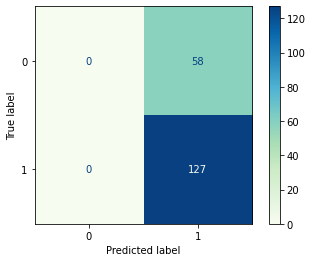

In [35]:
plot_confusion_matrix(gridsearch, X_test, y_test, cmap='GnBu')  
plt.savefig('confusion_matrix.png')

In [36]:
#test on single row
#gridsearch.predict_proba(test_row)

### Pickle


In [37]:
import pickle

In [38]:
#pickle gridsearch model
pickle_name = 'loan_model.sav'
pickle.dump(gridsearch, open(pickle_name, 'wb'))

In [39]:
#test it works
loaded_model = pickle.load(open(pickle_name, 'rb'))
result = loaded_model.predict_proba(X_test.iloc[[2]])
print(result)

[[0.3111 0.6889]]


### API

See `loan_flask.py` for turning pickle into API

For the post request to work `loan_flask.py` must be running in the local terminal

In [40]:
import requests
import json

In [41]:
#create test json out of single row
test_json = X_test.iloc[[2]].to_json(orient="records")
test_result = json.loads(test_json)[0]
print(test_result)

{'Loan_ID': 'LP001498', 'Gender': 'Male', 'Married': 'No', 'Dependents': '0', 'Education': 'Graduate', 'Self_Employed': 'No', 'ApplicantIncome': 5417, 'CoapplicantIncome': 0.0, 'LoanAmount': 168.0, 'Loan_Amount_Term': 360.0, 'Credit_History': 1.0, 'Property_Area': 'Urban'}


In [42]:
#testing while running on local terminal
url = 'http://192.168.0.108:5555/loan_prediction'
r = requests.post(url = url, json = test_result) 
print(r.json())

ConnectionError: HTTPConnectionPool(host='192.168.0.108', port=5555): Max retries exceeded with url: /loan_prediction (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x124561670>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [ ]:
test_params = {'Gender': 'Male', 'Married': 'No', 'Dependents': '0', 'Education': 'Graduate', 'Self_Employed': 'No'}

#testing the get request when running on local terminal
test = requests.get(url = url, params = test_params)
print(test.json())

### AWS

For AWS I copied 3 files into the server: the pickle, the flask `.py`, and custom functions

For the following to work it the `loan_flask.py` must be running on my ubuntu server.

In [ ]:
#testing while running on AWS server
url = 'http://ec2-3-99-131-102.ca-central-1.compute.amazonaws.com:5555/loan_prediction'
r = requests.post(url = url, json = test_result) 
print(r.json())